# Task1: Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Task2:Data Exploration

In [2]:
df=pd.read_csv("disney_movies.csv")

In [3]:
df

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


In [4]:
df['genre'].value_counts()

Comedy                 182
Adventure              129
Drama                  114
Action                  40
Thriller/Suspense       24
Romantic Comedy         23
Musical                 16
Documentary             16
Western                  7
Horror                   6
Black Comedy             3
Concert/Performance      2
Name: genre, dtype: int64

# checking null values

In [5]:
df.isnull().sum()

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [6]:
#Drop null values
df.dropna(subset=['genre'],inplace=True)

In [7]:
df

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


In [8]:
df.isnull().sum()

movie_title                  0
release_date                 0
genre                        0
mpaa_rating                 49
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [9]:
df['mpaa_rating'].value_counts()

PG           185
PG-13        141
R             98
G             86
Not Rated      3
Name: mpaa_rating, dtype: int64

In [10]:
mfq=df['mpaa_rating'].mode()[0]

In [11]:
mfq

'PG'

In [12]:
df['mpaa_rating'].fillna(mfq,inplace=True)

In [13]:
df.isnull().sum()

movie_title                 0
release_date                0
genre                       0
mpaa_rating                 0
total_gross                 0
inflation_adjusted_gross    0
dtype: int64

# release_date time into Datetime

In [14]:
df['release_date']=pd.to_datetime(df['release_date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   movie_title               562 non-null    object        
 1   release_date              562 non-null    datetime64[ns]
 2   genre                     562 non-null    object        
 3   mpaa_rating               562 non-null    object        
 4   total_gross               562 non-null    int64         
 5   inflation_adjusted_gross  562 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 30.7+ KB


In [16]:
df['year']=pd.DatetimeIndex(df['release_date']).year

In [17]:
df['movie_title'].value_counts()

The Jungle Book         3
Bad Company             2
Freaky Friday           2
101 Dalmatians          2
Cinderella              2
                       ..
The Scarlet Letter      1
Brother Bear            1
Young Black Stallion    1
Nixon                   1
Coyote Ugly             1
Name: movie_title, Length: 556, dtype: int64

# Best Gross Total

In [18]:
df1=pd.DataFrame(df.groupby(['movie_title'])["total_gross"].sum())

In [19]:
df1.reset_index(inplace=True)

In [20]:
df1.head()

,movie_title,total_gross
0,101 Dalmatians,289189294
1,102 Dalmatians,66941559
2,1492: Conquest of Paradise,7099531
3,"20,000 Leagues Under the Sea",28200000
4,25th Hour,13084595


In [21]:
df1['total_gross'].max()

936662225

In [22]:
df1.loc[df1['total_gross']==936662225]


,movie_title,total_gross
374,Star Wars Ep. VII: The Force Awakens,936662225


# Worst Gross Total

In [23]:
df1['total_gross'].min()

0

In [24]:
df1.loc[df1['total_gross']==0]

,movie_title,total_gross
31,Amy,0
101,Condorman,0


# Task3:Visualize Year Distribution Plot

<AxesSubplot:xlabel='year', ylabel='Density'>

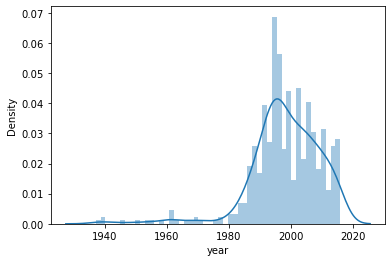

In [25]:
sns.distplot(df['year'],bins=50)

<BarContainer object of 562 artists>

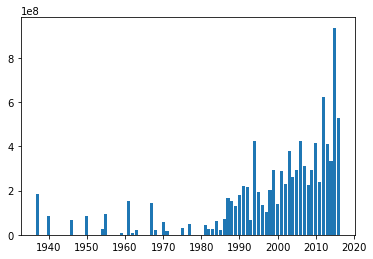

In [26]:
plt.bar(df['year'],df['total_gross'])

# Task3: Does Movies Income Decreased or Increased?

Movies Box offie Collection  increases as the intrest for watching movies in people developed through out decades.

# Task4:Describe the total counts of Genres

In [27]:
df['genre'].describe()

count        562
unique        12
top       Comedy
freq         182
Name: genre, dtype: object

# End of Project